# Example of Map Generation

Map generated in 0.174815 seconds


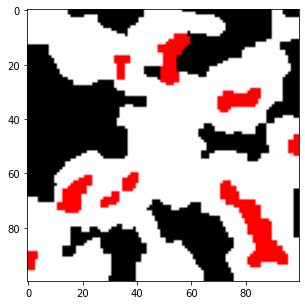

In [9]:
from swarm_mapping.map import Map
import time

t0 = time.time()
m = Map(100, 100, space_fill=0.5, hazard_fill=0.2, fast=False)
tf = time.time()
m.show()
print(f"Map generated in {round(tf - t0, 6)} seconds")

# World Generation

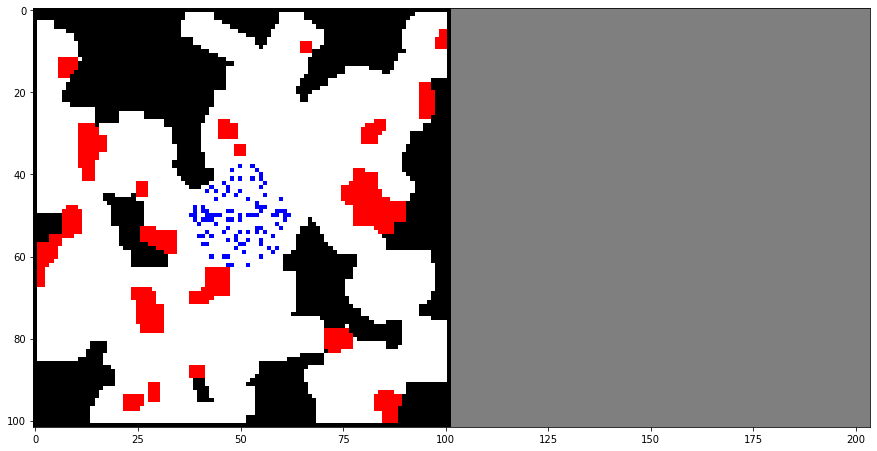

In [9]:
from swarm_mapping.world import World, Agent
from swarm_mapping.map import Map

w = World(100, 100, 100, space_fill=0.5, hazard_fill=0.2,fast=False, sensor_range=1)
w.show(size=(15,15))

0.00800013542175293 seconds to run step.
0.01804494857788086 seconds to render and display.


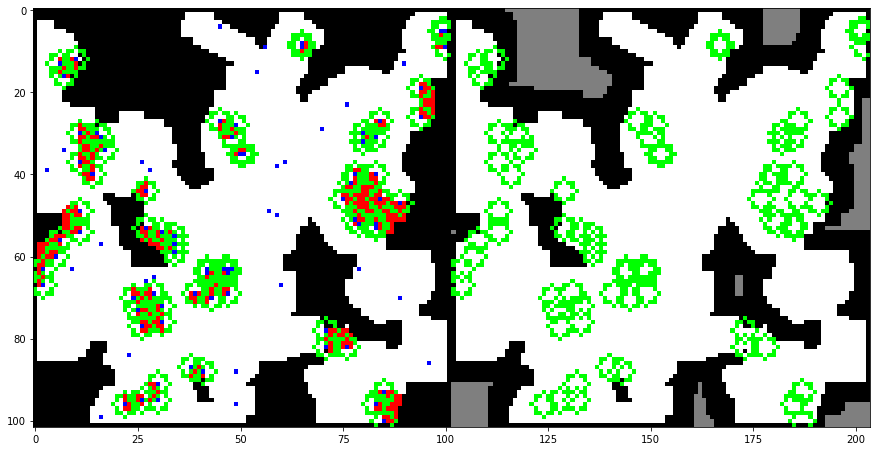

In [13]:
import time

# Iterate a step of the sim, and then show state
start = time.time()
w.step()
end = time.time()
print(f"{end - start} seconds to run step.")

start = time.time()
w.show(size=(15,15))
end = time.time()
print(f"{end - start} seconds to render and display.")

In [6]:
# Example of proximity sensor output
agent = w.agents[0]
agent.proximity()

array([[1., 1., 1.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [15]:
# Example of camera output
agent = w.agents[1]
agent.camera()

array([[ 0.,  0.,  0.,  3.,  3., -1.,  3.,  3., -1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  3., -1., -1., -1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  3., -1., -1., -1.,  1.,  1.],
       [ 0.,  0.,  0.,  3.,  3., -1.,  3.,  3., -1.,  1.,  1.],
       [ 0.,  0.,  0.,  3.,  0., -1., -1.,  3., -1.,  1.,  1.],
       [ 0.,  0.,  3.,  0.,  0.,  2., -1., -1.,  3.,  1.,  1.],
       [ 0.,  0.,  0.,  3.,  0.,  0.,  0.,  3.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  3.,  3.,  0.,  3.,  3.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  3.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

### Run and Animate Simulation

In [10]:
import cv2
import numpy as np

# Display size
display_width = 1600
display_height = 800

step = 0
while True:
    frame = w.render()
    shared_map = w.render(w.agents_map)
    frame = np.concatenate((frame, shared_map), axis=1)
    frame = cv2.resize(frame, (display_width, display_height), interpolation = cv2.INTER_AREA)
    cv2.imshow('Sim',cv2.cvtColor((frame*255).astype(np.uint8), cv2.COLOR_RGB2BGR))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    w.step()
    step += 1
cv2.destroyAllWindows()

### Print Agent States

In [7]:
for agent in w.agents:
    print(agent)

Agent at (28.70791385071235,30.937272633563175), with velocity (-0.0, 1.0), alive: True
Agent at (91.702683293316,64.4407529457165), with velocity (0.7071067811865475, 0.7071067811865475), alive: True
Agent at (47.82038243217644,40.47520807562012), with velocity (-0.0, -1.0), alive: True
Agent at (22.22264103233794,54.12475683839193), with velocity (-0.7071067811865475, 0.7071067811865475), alive: False
Agent at (18.85483569413203,19.360661020876314), with velocity (-0.894427190999916, -0.4472135954999578), alive: False
Agent at (84.63970525489688,54.17505280856933), with velocity (1.0, -0.0), alive: True
Agent at (59.0131558185582,39.81543887831405), with velocity (-0.894427190999916, -0.4472135954999578), alive: True
Agent at (57.546621348679345,38.616911295525085), with velocity (-0.0, 1.0), alive: True
Agent at (43.70259188916326,76.61085383802009), with velocity (0.7071067811865475, -0.7071067811865475), alive: True
Agent at (22.954613913304133,17.056569908929394), with velocity (